# Lab - Janelas

Esta mostra a visualização de janelas no domínio do tempo e da frequência, e o efeito do janelamento no sinal senoidal.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *

1) plote no mesmo eixo as janelas retangular, triangular, hann, hamming e blackman,com 65 valores. <br>
(dica: janelas = [boxcar, bartlett, hann, hamming, blackman] é uma lista das funções janelas, e função.\__nome é uma string como nome da função )

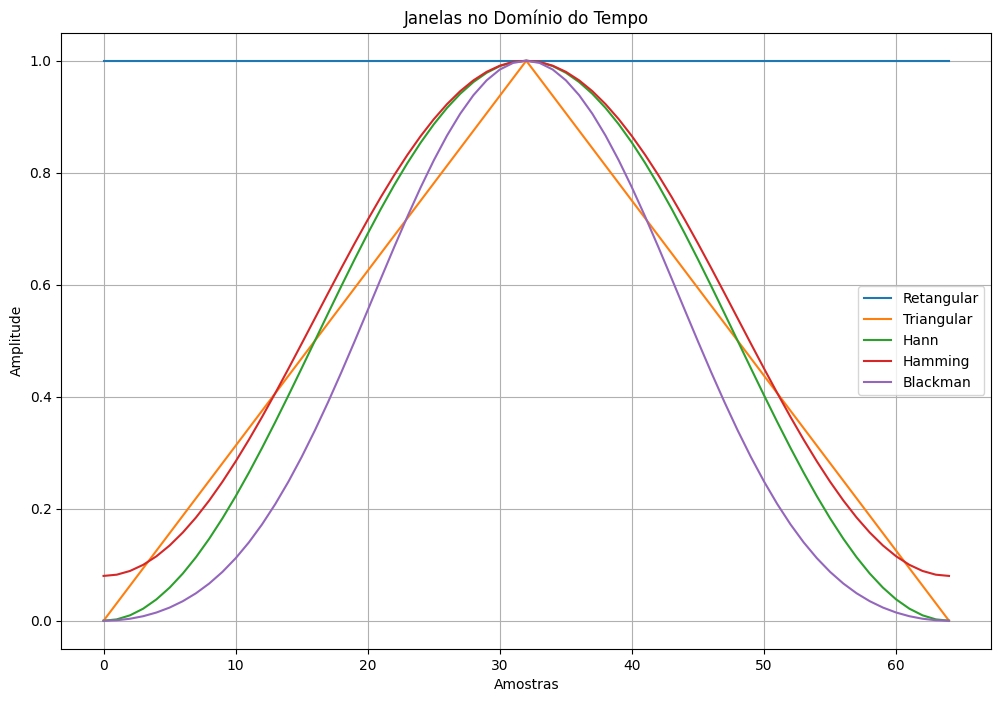

In [2]:
# Definindo o número de pontos na janela
N = 65

# Criando uma lista de nomes de janelas e suas funções correspondentes
janelas = [("Retangular", boxcar), ("Triangular", bartlett), ("Hann", hann), ("Hamming", hamming), ("Blackman", blackman)]

# Criando um array de amostras de 0 a N-1
n = arange(0, N)

# Criando um gráfico para as janelas
figure(figsize=(12,8))

for nome, janela_func in janelas:
    # Calculando a janela com a função correspondente
    janela = janela_func(N)
    
    # Plotando a janela no mesmo eixo
    plot(n, janela, label=nome)

# Configurando o gráfico
xlabel('Amostras')
ylabel('Amplitude')
title('Janelas no Domínio do Tempo')
legend()
grid()

# Mostrando o gráfico
show()

2) plote no mesmo eixo as transformadas de fourier das janelas retangular, triangular, hann, hamming e blackman. <br>
Considerar janelas de 16 valores, completando com zeros até 256. <br>
usar fftshift(), para ter a frequência zero no centro. <br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.


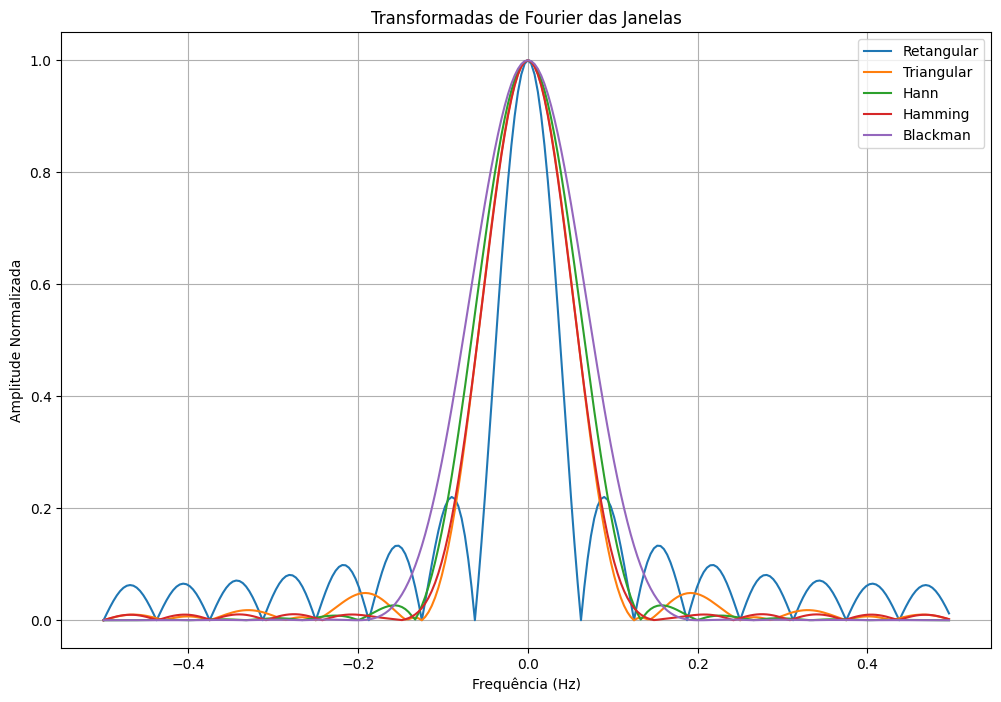

In [3]:
# Definindo o tamanho da janela original (16 valores)
N_original = 16

# Completa com zeros até 256
N = 256

# Criando uma lista de nomes de janelas e suas funções correspondentes
janelas = [("Retangular", boxcar), ("Triangular", bartlett), ("Hann", hann), ("Hamming", hamming), ("Blackman", blackman)]

# Criando um array de amostras de 0 a N-1
n = arange(0, N_original)

# Criando um gráfico para as transformadas de Fourier das janelas
figure(figsize=(12,8))

for nome, janela_func in janelas:
    # Calculando a janela com a função correspondente
    janela = janela_func(N_original)
    
    # Completa com zeros até N
    janela = pad(janela, (0, N - N_original), 'constant')
    
    # Calcula a transformada de Fourier
    janela_fft = fftshift(fft(janela))
    
    # Normaliza os valores dividindo pelo máximo
    janela_fft /= max(janela_fft)
    
    # Cria um array de frequências
    freq = fftshift(fftfreq(N, 1))
    
    # Plotando a transformada de Fourier
    plot(freq, abs(janela_fft), label=nome)

# Configurando o gráfico
xlabel('Frequência (Hz)')
ylabel('Amplitude Normalizada')
title('Transformadas de Fourier das Janelas')
legend()
grid()

# Mostrando o gráfico
show()

3) Qual dessas janelas possui espectro com menor largura do lobulo principal ? E qual dessas janelas possui menor amplitude de lóbulo lateral?
    
        A janela retangular possui espectro com menor largura do lobulo principal. Já a blackman possui menor amplitude de lóbulo lateral

4) Plot janelas de kaiser com parametros beta=[0.1, 1, 6, 9, 12].<br>
Para comparação, plote janelas hann e blackman com simbolo 'o'.

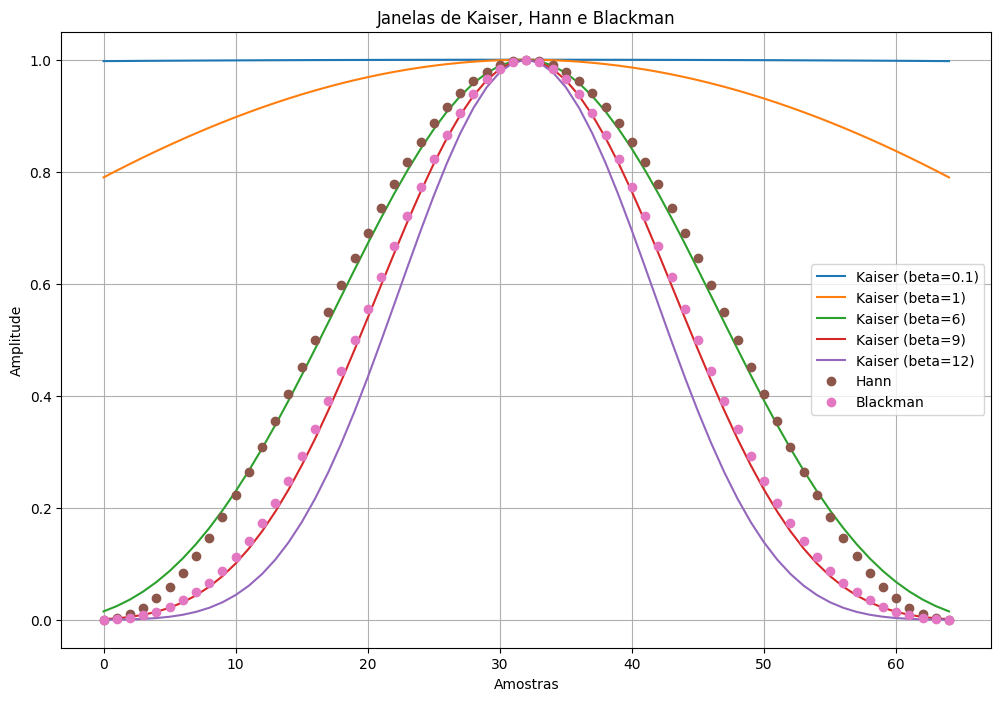

In [4]:
from scipy.signal import kaiser, hann, blackman

# Definindo o tamanho da janela
N = 65

# Criando um array de amostras de 0 a N-1
n = arange(0, N)

# Parâmetros beta para janelas de Kaiser
betas = [0.1, 1, 6, 9, 12]

# Criando um gráfico para as janelas de Kaiser, Hann e Blackman com o tamanho da figura especificado
figure(figsize=(12, 8))

for beta in betas:
    # Calculando a janela de Kaiser com o beta especificado
    janela_kaiser = kaiser(N, beta)
    
    # Plotando a janela de Kaiser como linhas sólidas
    plot(n, janela_kaiser, label=f'Kaiser (beta={beta})')

# Calculando as janelas Hann e Blackman
janela_hann = hann(N)
janela_blackman = blackman(N)

# Plotando as janelas Hann e Blackman como linhas sólidas com pontos
plot(n, janela_hann, 'o', label='Hann')
plot(n, janela_blackman, 'o', label='Blackman')

# Configurando o gráfico
xlabel('Amostras')
ylabel('Amplitude')
title('Janelas de Kaiser, Hann e Blackman')
legend()
grid()

# Mostrando o gráfico
show()


5) crie vetor x com 16 elementos, uma senoide com 4 ciclos.<br>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


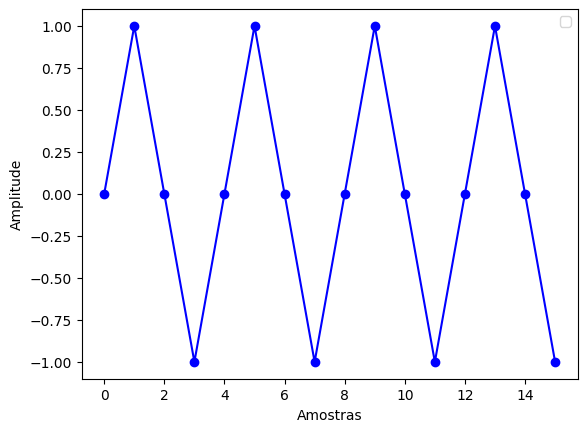

In [29]:
import matplotlib.pyplot as plt

# Número de elementos desejado
N = 16

# Número de ciclos da senoide
num_ciclos = 4

# Frequência da senoide em radianos por amostra
frequencia = 2 * pi * num_ciclos / N

# Criando o vetor x com a senoide
x = sin(frequencia * arange(N))

# Criando um vetor de amostras de 0 a N-1
n = arange(N)

# Plotando a senoide sem interrupções
plot(n, x, color='blue')
scatter(n, x, color='blue', marker='o')

xlabel('Amostras')
ylabel('Amplitude')
legend()
show()


6) crie vetor y, acrescentando 240 zeros ao vetor x. 

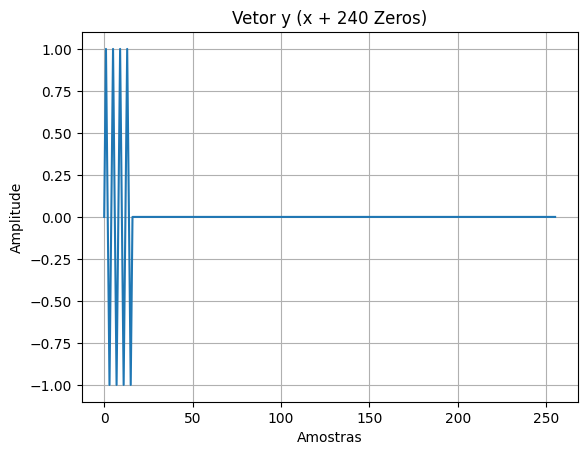

In [30]:
# Número de elementos desejado em x
N = 16

# Número de ciclos da senoide em x
num_ciclos = 4

# Frequência da senoide em radianos por amostra
frequencia = 2 * pi * num_ciclos / N

# Criando o vetor x com a senoide
x = sin(frequencia * arange(N))

# Acrescentando 240 zeros ao vetor x para criar o vetor y
y = concatenate([x, zeros(240)])

# Criando um vetor de amostras de 0 a N + 240 - 1
n = arange(N + 240)

# Plotar os resultados
plot(n, y)
xlabel('Amostras')
ylabel('Amplitude')
title('Vetor y (x + 240 Zeros)')
grid(True)
show()

7) crie vetor z com 256 elementos, uma senoide com a mesma frequência. <br>

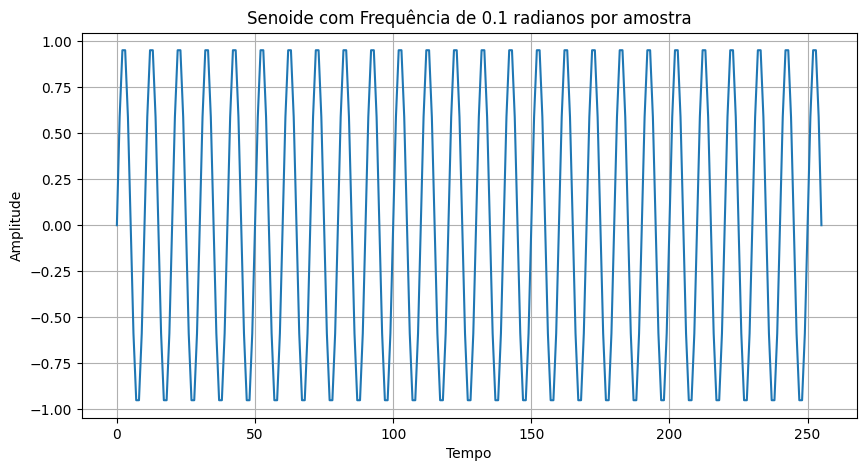

In [31]:
# Número de amostras
n_amostras = 256

# Frequência da senoide (em radianos por amostra)
frequencia = 0.1

# Crie um vetor z com 256 elementos
z = zeros(n_amostras)

# Crie a senoide com a mesma frequência
tempo = arange(n_amostras)
senoide = sin(2 * pi * frequencia * tempo)

# Atribua a senoide ao vetor z
z = senoide

# Plotar o vetor z (senoide)
figure(figsize=(10, 5))
plot(tempo, z)
xlabel('Tempo')
ylabel('Amplitude')
title('Senoide com Frequência de 0.1 radianos por amostra')
grid(True)
show()


8) plote no mesmo eixo os espectros dos tres sinais.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

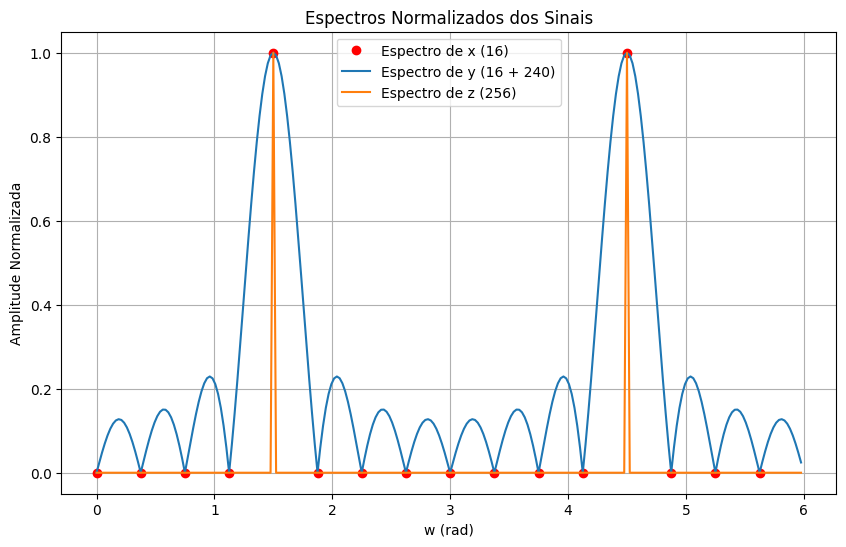

In [53]:
# Número de pontos para o espectro de x (menos pontos)
N_x = 16

# Frequência da senoide (4 ciclos em 16 pontos)
f = 4 / 16

# Criando o vetor x com 16 elementos (senoide)
x = sin(2 * pi * f * arange(16))

# Criando o vetor y com 256 elementos (senoide com zeros adicionados)
y = concatenate((x, zeros(240)))

# Criando o vetor z com 256 elementos (senoide com a mesma frequência)
z = sin(2 * pi * f * arange(256))

# Calcula os espectros dos sinais x, y e z
spec_x = fft(x, N_x)
spec_y = fft(y, N)
spec_z = fft(z, N)

# Normaliza os espectros dividindo pelo máximo de cada janela
spec_x_normalized = abs(spec_x) / max(abs(spec_x))
spec_y_normalized = abs(spec_y) / max(abs(spec_y))
spec_z_normalized = abs(spec_z) / max(abs(spec_z))

# Frequências correspondentes aos pontos do espectro (0 a 6 radianos)
freq_x = linspace(0, 6, N_x, endpoint=False)
freq = linspace(0, 6, N, endpoint=False)

# Plotando os espectros normalizados
figure(figsize=(10, 6))
plot(freq_x, spec_x_normalized, marker='o', linestyle='None', color='r', label='Espectro de x (16)')
plot(freq[:N], spec_y_normalized, label='Espectro de y (16 + 240)')
plot(freq, spec_z_normalized, label='Espectro de z (256)')
xlabel('w (rad)')
ylabel('Amplitude Normalizada')
title('Espectros Normalizados dos Sinais')
legend()
grid(True)
show()


A partir da resposta em frequência obtida é possível notar a ocorrência do vazamento. Ao aplicar o método de janelamento a componente em uma frequência "vaza" nas componentes vizinhos devido ao espalhamento espectral causado pela janela.

9) Obter o sinal zz multiplicando o sinal z por uma janela de hann de tamanho 16.

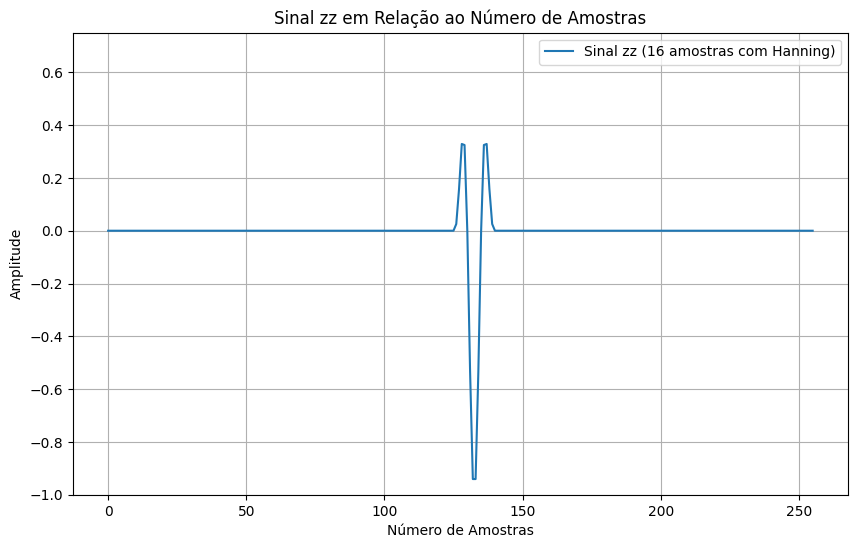

In [16]:
# Número de amostras
n_amostras = 256

# Frequência da senoide (em radianos por amostra)
frequencia = 0.1

# Crie um vetor z com 256 elementos (senoide)
tempo = arange(n_amostras)
z = sin(2 * pi * frequencia * tempo)

# Crie uma janela de Hanning de tamanho 16
janela_hann = hanning(16)

# Aplicando a janela de Hanning ao sinal z (element-wise multiplicação)
zz = zeros(256)
zz[125:141] = z[:16] * janela_hann

# Plotando o sinal zz em relação ao número de amostras
figure(figsize=(10, 6))
plot(arange(256), zz, label='Sinal zz (16 amostras com Hanning)')
xlabel('Número de Amostras')
ylabel('Amplitude')
title('Sinal zz em Relação ao Número de Amostras')
ylim(-1, 0.75)  # Define o limite do eixo y para corresponder à faixa desejada
legend()
grid(True)
show()


10) Plote no mesmo eixo os espectros dos tres sinais do item 8) e o espectro de zz.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

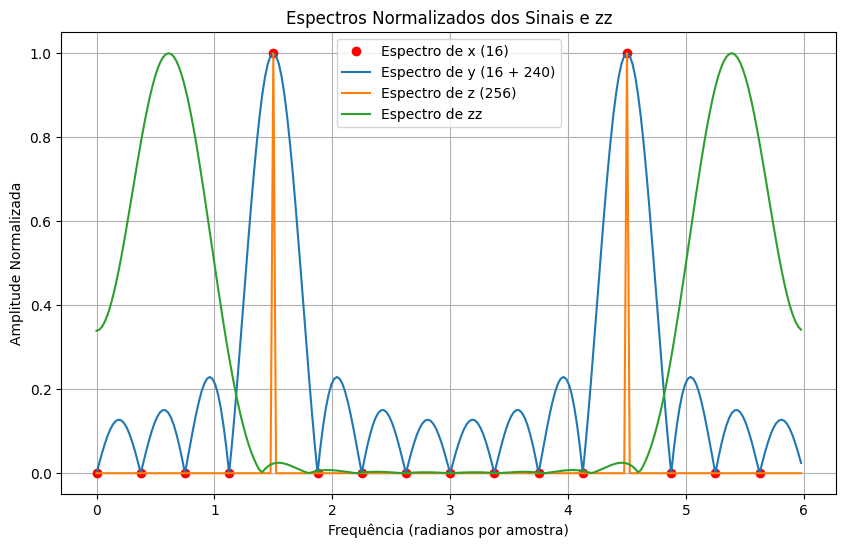

In [71]:
# Número de pontos para o espectro de x (menos pontos)
N_x = 16

# Frequência da senoide (4 ciclos em 16 pontos)
f = 4 / 16

# Criando o vetor x com 16 elementos (senoide)
x = sin(2 * pi * f * arange(16))

# Cria o vetor y com 256 elementos (senoide com zeros adicionados)
y = concatenate((x, zeros(240)))

# Criando o vetor z com 256 elementos (senoide com a mesma frequência)
z = sin(2 * pi * f * arange(256))

# Calcula os espectros dos sinais x, y, z e zz
spec_x = fft(x, N_x)
spec_y = fft(y, N)
spec_z = fft(z, N)
spec_zz = fft(zz, N)

# Normalizando os espectros dividindo pelo máximo de cada janela
spec_x_normalized = abs(spec_x) / max(abs(spec_x))
spec_y_normalized = abs(spec_y) / max(abs(spec_y))
spec_z_normalized = abs(spec_z) / max(abs(spec_z))
spec_zz_normalized = abs(spec_zz) / max(abs(spec_zz))

# Frequências correspondentes aos pontos do espectro (0 a 6 radianos)
freq_x = linspace(0, 6, N_x, endpoint=False)
freq = linspace(0, 6, N, endpoint=False)

# Espectros normalizados no mesmo eixo
figure(figsize=(10, 6))
plot(freq_x, spec_x_normalized, marker='o', linestyle='None', color='r', label='Espectro de x (16)')
plot(freq[:N], spec_y_normalized, label='Espectro de y (16 + 240)')
plot(freq, spec_z_normalized, label='Espectro de z (256)')
plot(freq, spec_zz_normalized, label='Espectro de zz')
xlabel('Frequência (radianos por amostra)')
ylabel('Amplitude Normalizada')
title('Espectros Normalizados dos Sinais e zz')
legend()
grid(True)
show()
